# Introduction

In this particular task of the GRIP Foundations task, we will be focusing on applying the Linear Regression model on the give data and give the predicted value of the question asked in the task

# Importing Libraries

This are the most basic and useful libraries that we will be using throughout the task

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data_link='http://bit.ly/w-data'
df=pd.read_csv(data_link)

In [6]:
df.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
df.shape

(25, 2)

Here we can see that the data set contains the number of study hours and the scores obtained by the student. From the data we can have an intution of the scores scored on the basis of hours studied. Based on the values we can see that Scores are increasing as the hours studied are increasing, from this we can say that there is a possibility of a Linear dependency of the two variables on each other. Here by analysis we will try to prove our hypothesis.

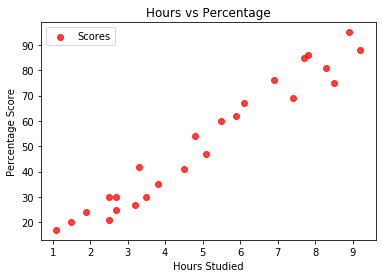

In [20]:
#To see the nature of the graph, and see the corelation btween the two variables

plt.scatter(x=df['Hours'], y=df['Scores'], marker='o', alpha=0.75, c='r', label='Scores')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.legend()
plt.show()

As we can see from the above scatter plot, we have two variables contaning the number of hours and scores. Hence, we will be trying to predict the scores of the student based on just one single feature which is number of study hours. Such a type of linear regression is called Simple Linear Regression that only considers the use of one feature to predict the result.

# Data Visualization

We will start our visualization by finding the correlation between the two variables and how well they are correlated.

In [26]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


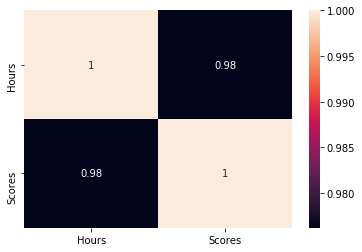

In [28]:
sns.heatmap(df.corr(),annot=True)

Using the pandas describe function will give us a quick look at the various indicators of our feature

In [25]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


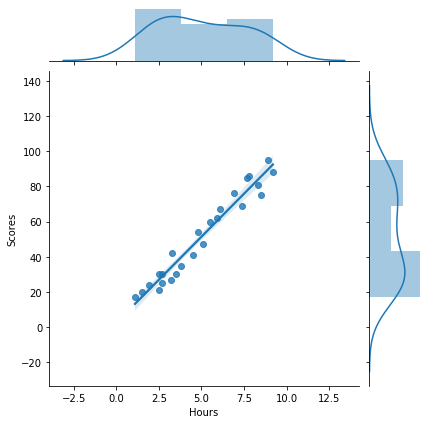

In [29]:
sns.jointplot(x=df['Hours'], y=df['Scores'], kind='reg', data=df)

# Regression model for prediction

Now that we have seen a linear relationship, let us perform a linear regression to find the value of scores at 9.25 study hours

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
# split train and test data

X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [42]:
Linreg = LinearRegression().fit(X_train, y_train)

In [43]:
print(f"The linear coefficient of the Linear Regression line is {Linreg.coef_}")
print(f"The linear intercept of the Linear Regression line is {Linreg.intercept_}")

The linear coefficient of the Linear Regression line is [[9.91065648]]
The linear intercept of the Linear Regression line is [2.01816004]


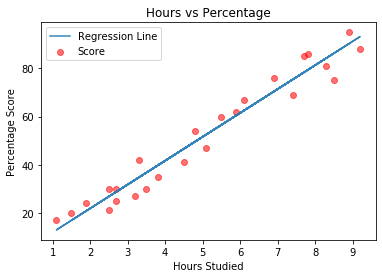

In [44]:
# therefore showing the relation of the Linear Regression line after fitting the data

plot_line = (Linreg.coef_*X) + Linreg.intercept_          # y=m*x+c

plt.scatter(X, y, marker='o', c='r',alpha=0.55,label='Score')
plt.plot(X, plot_line, alpha=0.9, label="Regression Line")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.legend()
plt.show()

In [45]:
# Train Score

Linreg.score(X_train, y_train)

0.9515510725211553

In [46]:
# Test Score

Linreg.score(X_test, y_test)

0.9454906892105356

In [47]:
# predicted values

y_pred = Linreg.predict(X_test)

In [48]:
inp_hr = np.array(9.25).reshape(-1,1)
Linreg.predict(inp_hr)

array([[93.69173249]])

we will show the difference in the actual and predicted values acording tot the linear regression line formed by the regressor model

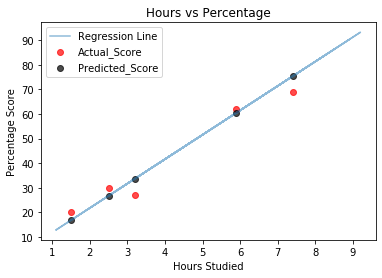

In [55]:
plt.scatter(X_test, y_test, marker='o', c='r',alpha=0.7,label='Actual_Score')
plt.scatter(X_test, y_pred, marker='o', c='black',alpha=0.7,label='Predicted_Score')
plt.plot(X, plot_line, alpha=0.5, label="Regression Line")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.legend()
plt.show()

Showing error in dfferent forms, will help in validating the results

In [65]:
# to show the error between the Actual Scores and the Predicted Scores

df_compare = pd.DataFrame(y_test,columns=['Actual_Scores'])
df_compare['Predicted_Scores'] = y_pred
df_compare['Absolute_error']=abs(df_compare['Actual_Scores']-df_compare['Predicted_Scores'])
df_compare['%_error']=100*(df_compare['Absolute_error'])/df_compare['Actual_Scores']
df_compare

,Actual_Scores,Predicted_Scores,Absolute_error,%_error
0,20,16.884145,3.115855,15.579276
1,27,33.732261,6.732261,24.934299
2,69,75.357018,6.357018,9.213070
3,30,26.794801,3.205199,10.683996
4,62,60.491033,1.508967,2.433817


In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

root_mean_square = np.sqrt(mean_squared_error(y_pred, y_test))
mean_abs = mean_absolute_error(y_pred, y_test)

print(f"The root_mean_square_error(rmse) is {root_mean_square}")
print(f"The mean_absolute_error is {mean_abs}")

The root_mean_square_error(rmse) is 4.6474476121003665
The mean_absolute_error is 4.183859899002975


In [74]:
print(f"The train set score was {Linreg.score(X_train, y_train)}")
print(f"The test set score was {Linreg.score(X_test, y_test)}")

The train set score was 0.9515510725211553
The test set score was 0.9454906892105356


In [73]:
print(f'Predicted score using Linear Regression with 9.25 hours of study: {Linreg.predict(inp_hr)[0][0]}')

Predicted score using Linear Regression with 9.25 hours of study: 93.69173248737538


# Conclusion

Once we have applied a simple linear regression, we could draw the following conclusions:

    The root mean squared error of the predictions is 4.647
    The mean absolute error is 4.183
    The predicted score of a student who studies for 9.25 hours is 93.691 according to simple linear regression algorithm